## <span style="color:#2F749F;"><strong>📦 Sesión práctica 3: Análisis Multivariado</strong></span>


## <span style="color:black;"><strong>Datos del estudiante</strong></span>

In [1]:
# Solicitar datos al estudiante
nombre = input("Ingresa tu nombre completo: ")
correo = input("Ingresa tu correo electrónico: ")

# Mostrar los datos ingresados
print("\nResumen de datos ingresados:")
print(f"Nombre: {nombre}")
print(f"Correo electrónico: {correo}")


Ingresa tu nombre completo: Estefania Hurtado Reina
Ingresa tu correo electrónico: estefania.hurtado@udea.edu.co

Resumen de datos ingresados:
Nombre: Estefania Hurtado Reina
Correo electrónico: estefania.hurtado@udea.edu.co


## <span style="color:black;"><strong>Parte 3: Análisis Multivariado</strong></span>

In [2]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from seaborn import load_dataset

### <span style="color:#2F749F;"><strong>Ejercicio1: Análisis de componentes principales</strong></span>

A partir de un conjunto de datos real sobre pingüinos antárticos, realiza un análisis multivariado utilizando PCA para reducir la dimensionalidad y visualizar agrupamientos por especie.

1. Carga el conjunto de datos penguins desde la librería seaborn `load_dataset("penguins")`.
2. Selecciona las siguientes variables morfológicas para el análisis:
   - 'bill_length_mm'
   - 'bill_depth_mm'
   - 'flipper_length_mm'
   - 'body_mass_g'
3. Estandariza las variables seleccionadas usando StandardScaler.
4. Aplica PCA()
5. Imprime las ecuaciones que obtuviste para el número de componentes que utilizaste
6. Grafica los resultados en un plano bidimensional (PC1 vs PC2), diferenciando por especie (ver imagen).
7. Interpreta visualmente qué especies se agrupan o separan mejor en el espacio reducido.



Visualización del dataset:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


Checkeo de valores nulos:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


Visualización del dataset filtrado:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g species
0            39.1           18.7              181.0       

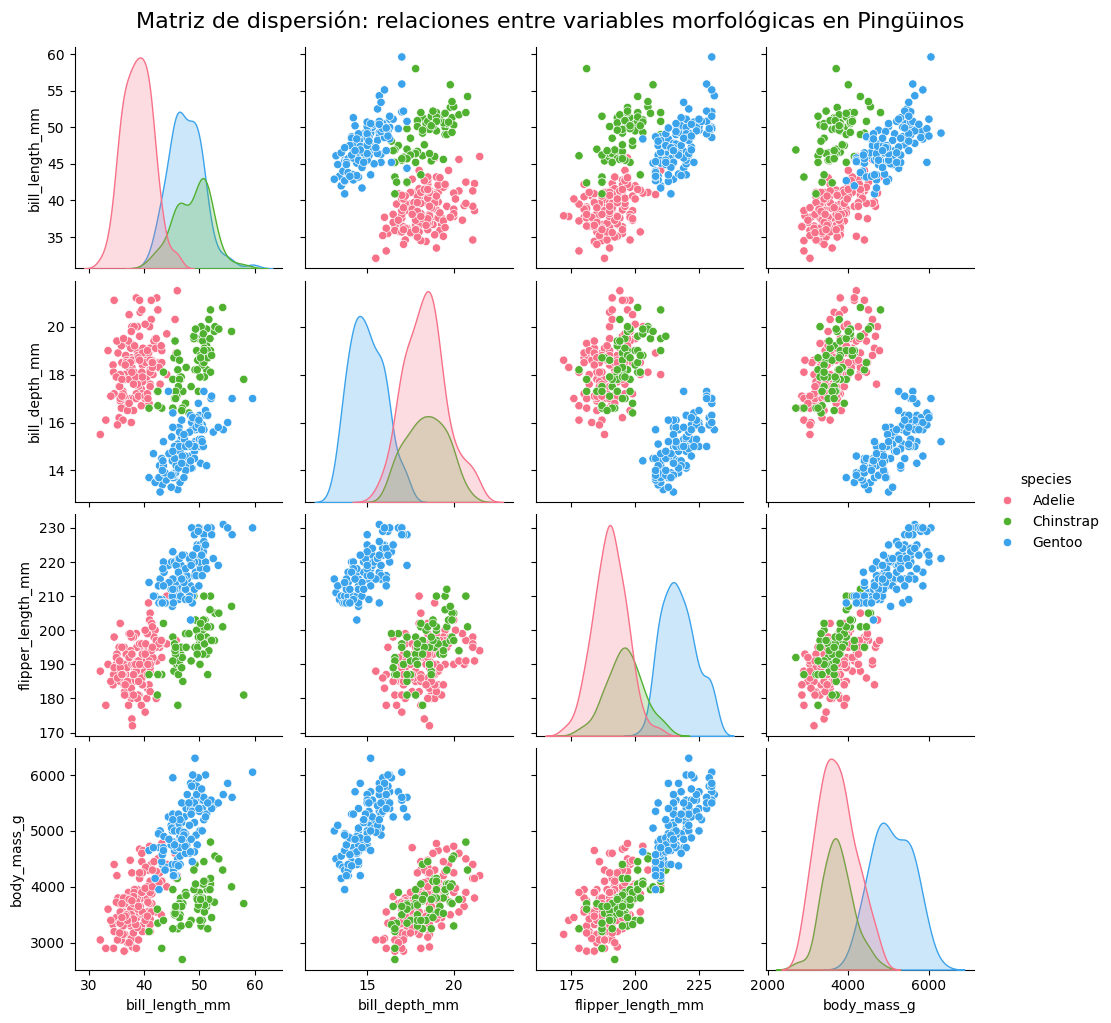

In [3]:
#1. Cargar datos
data = sns.load_dataset("penguins")
print("Visualización del dataset:")
print(data.head())

#Tratamiento de valores nulos
print("\n")
print("Checkeo de valores nulos:")
print(data.isnull().sum())

data = data.dropna()

#2. Seleccionar variables morfológicas
vbles = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

#Crear DataFrame
df = pd.DataFrame(data, columns=vbles + ['species'])
print("\n")
print("Visualización del dataset filtrado:")
print(df.head())

#Visualización de relaciones entre variables
sns.pairplot(df, hue='species', palette='husl', diag_kind='auto', corner=False)
print("\n")
plt.suptitle('Matriz de dispersión: relaciones entre variables morfológicas en Pingüinos', fontsize=16, y=1.02)
plt.show()

Se notan diferencias entre todas las especies para la variable bill_lenght en relación con bill depht, flipper lenght y body mass. Para las relaciones entre bill depth, glipper lenght y body mass entre ellas, la especie "Gentoo" muestra diferenciación respecto a las otras especies.

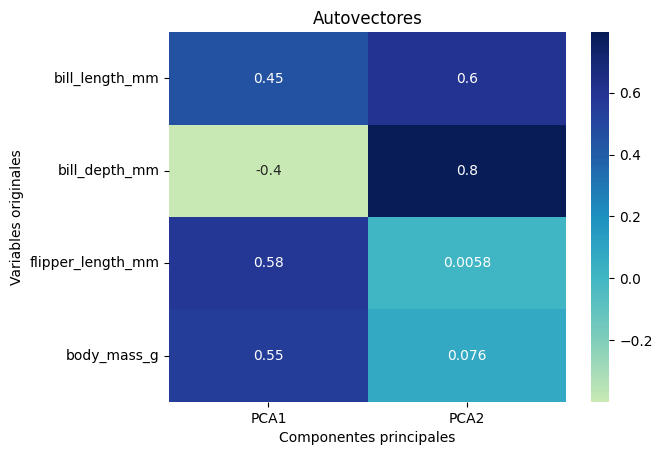



Ecuaciones de los componentes principales:

PCA1 = 0.454·'bill_length_mm' + -0.399·'bill_depth_mm' + 0.577·'flipper_length_mm' + 0.55·'body_mass_g'
PCA2 = 0.6·'bill_length_mm' + 0.796·'bill_depth_mm' + 0.006·'flipper_length_mm' + 0.076·'body_mass_g'


In [4]:
#3. Estandarizar variables
scaler = StandardScaler()
P_scaled = scaler.fit_transform(df[vbles]) # Standardize only morphological variables

#4. Aplicar PCA
pca = PCA(n_components= 2) #Ya que son 4 variables, quedar con 2 PCA es una buena reducción
P_pca = pca.fit_transform(P_scaled)

# Matriz de componentes
componentes = pd.DataFrame(pca.components_.T,
                           columns=[f'PCA{i+1}' for i in range(pca.components_.shape[0])],
                           index=vbles)
# Visualización de autovectores
sns.heatmap(componentes, annot=True, cmap='YlGnBu', center=0)
plt.title('Autovectores')
plt.ylabel('Variables originales')
plt.xlabel('Componentes principales')
plt.show()

#5. Ecuaciones de los componentes principales con nombres reales
print("\n")
print("Ecuaciones de los componentes principales:\n")

for i, comp in enumerate(componentes.columns): #Recorre cada componente principal
    pesos = pca.components_[i] #Extrae los pesos de las componentes (cuánto contribuye cada variable a esa componente)
    ecuacion = " + ".join([f"{round(pesos[j], 3)}·'{vbles[j]}'" for j in range(len(pesos))]) #Construir cadena de texto. Por cada variable j, toma peso, lo redondea a 3 decimales y lo multiplica por el nombre de la variables
    print(f"{comp} = {ecuacion}")

El mapa de calor visualiza el peso de cada variable en cada componente, en este caso, en la PCA1, las variables "flipper lenght" y "body mass" son las que más peso tienen, y en la PCA2, "bill_lenght" y "bill depth" son las que más peso tienen.

Varianza explicada por componente:
PCA1 = 0.6863
PCA2 = 0.1945

Varianza explicada acumulada:
Hasta PCA1 = 0.6863
Hasta PCA2 = 0.8809

La varianza explicada es mayor al 70%, por lo que las PCA1 y PCA2 capturan suficientente para un análisis confiable



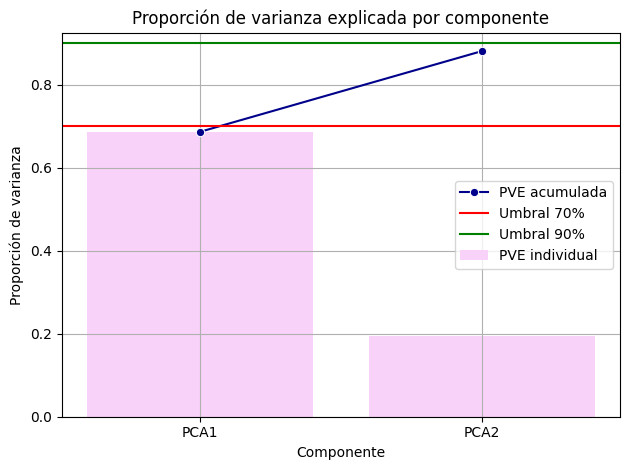

In [5]:
#Varianza explicada
var = pca.explained_variance_ratio_
var_exp = pca.explained_variance_ratio_
var_exp_acum = np.cumsum(var_exp)
componentes = [f'PCA{i+1}' for i in range(len(var_exp))]

print("Varianza explicada por componente:")
for i, comp in enumerate(componentes):
    print(f"{comp} = {var_exp[i]:.4f}")

print("\nVarianza explicada acumulada:")
for i, comp in enumerate(componentes):
    print(f"Hasta {comp} = {var_exp_acum[i]:.4f}")

#Condicional para sugerir añadir más componentes si la varianza explicada no llega al 70%
if var_exp_acum[-1] < 0.7:
    print("\nLa varianza explicada es menor al 70% , se recomienda modificar la cantidad de PCA")
else:
    print("\nLa varianza explicada es mayor al 70%, por lo que las PCA1 y PCA2 capturan suficientente para un análisis confiable\n")

# DataFrame para visualización
df_varianza = pd.DataFrame({
    'Componente': componentes,
    'Autovalor': var,
    'Porción de varianza explicada': var_exp,
    'Porción de varianza expicada acumulada': var_exp_acum,
})

# Proporción de varianza explicada
sns.barplot(x='Componente', y='Porción de varianza explicada', data=df_varianza, color='#FFCCFF', label='PVE individual')
sns.lineplot(x='Componente', y='Porción de varianza expicada acumulada', data=df_varianza, marker='o', color='darkblue', label='PVE acumulada')
plt.axhline(0.7, color='red', linestyle='-', label='Umbral 70%')
plt.axhline(0.9, color='green', linestyle='-', label='Umbral 90%')
plt.title('Proporción de varianza explicada por componente')
plt.ylabel('Proporción de varianza')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

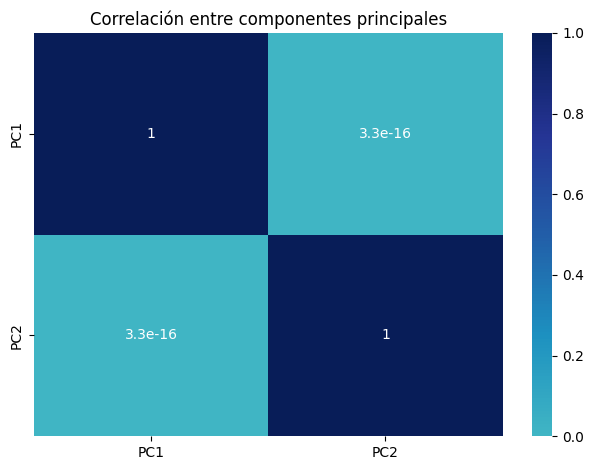

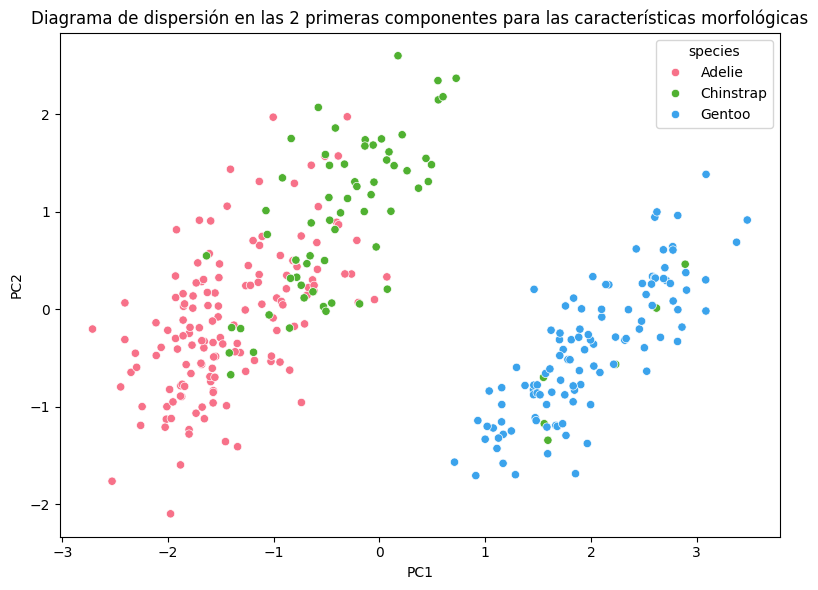

In [6]:
#6. Grafica PC1 vs PC2
#Crear DataFrame con las PCA
df_pca = pd.DataFrame(P_pca, columns=[f'PC{i+1}' for i in range(len(var_exp))])
correlaciones = df_pca.corr()

# Ortogonalidad entre las componentes
sns.heatmap(correlaciones, annot=True, cmap='YlGnBu', center=0)
plt.title('Correlación entre componentes principales')
plt.tight_layout()
plt.show()

df_pca['species'] = df['species']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='species', palette='husl')
plt.title('Diagrama de dispersión en las 2 primeras componentes para las características morfológicas')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

El mapa de calor de correlaciones no sugiere una correlación significativa entre las componentes principales (3.3e-16), por lo que puede concluirse que ambas componentes están aportando información única

La especie Gentoo se separa mejor ya que está alejado de los otros grupos. Entre las 3 especies, la especie Chinstrap es la que menos agrupación refleja, dado que se pueden ver valores más dispersos.

### <span style="color:#2F749F;"><strong>Ejercicio 2: Regresión Lineal Múltiple</strong></span>  

A partir de un conjunto de datos real sobre diamantes, realiza un análisis de regresión lineal múltiple para predecir el precio en función de variables numéricas relacionadas con sus características físicas.  

1. Carga el conjunto de datos `diamonds` desde la librería seaborn `load_dataset("diamonds")`.  
2. Selecciona las siguientes variables predictoras para el análisis:  
   - `carat`  
   - `depth`  
   - `table`  
   - `x`  
   - `y`  
   - `z`  
3. Define como variable respuesta el precio (`price`).  
4. Divide los datos en entrenamiento y prueba para validar el modelo.  
5. Ajusta un modelo de **Regresión Lineal Múltiple** usando `statsmodels.OLS()`.  
6. Imprime el resumen del modelo (coeficientes, significancia, R² ajustado, etc.).  
7. Evalúa el desempeño del modelo con métricas de ajuste como **RMSE** y **R²** en el conjunto de prueba.  
8. Grafica los valores reales vs. los valores predichos del precio para interpretar la calidad del ajuste.  




In [7]:
#Importar librerías
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [14]:
#1. Cargar datos
data = sns.load_dataset("diamonds")
print("Visualización del dataset:")
print(data.head())
print(f"\nNúmero de datos: {len(data)}")

#Tratamiento de valores nulos
print("\nCheckeo de valores nulos:")
print(data.isnull().sum())

#2. Seleccionar variables predictoras
X = ['carat', 'depth', 'table', 'x', 'y', 'z']

#3. Seleccionar variable respuesta
y= data['price']
print("\nEstadísticas Descriptivas de la variable 'Precio'")
price_stats = y.describe()
print(price_stats)

Visualización del dataset:
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

Número de datos: 53940

Checkeo de valores nulos:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Estadísticas Descriptivas de la variable 'Precio'
count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64


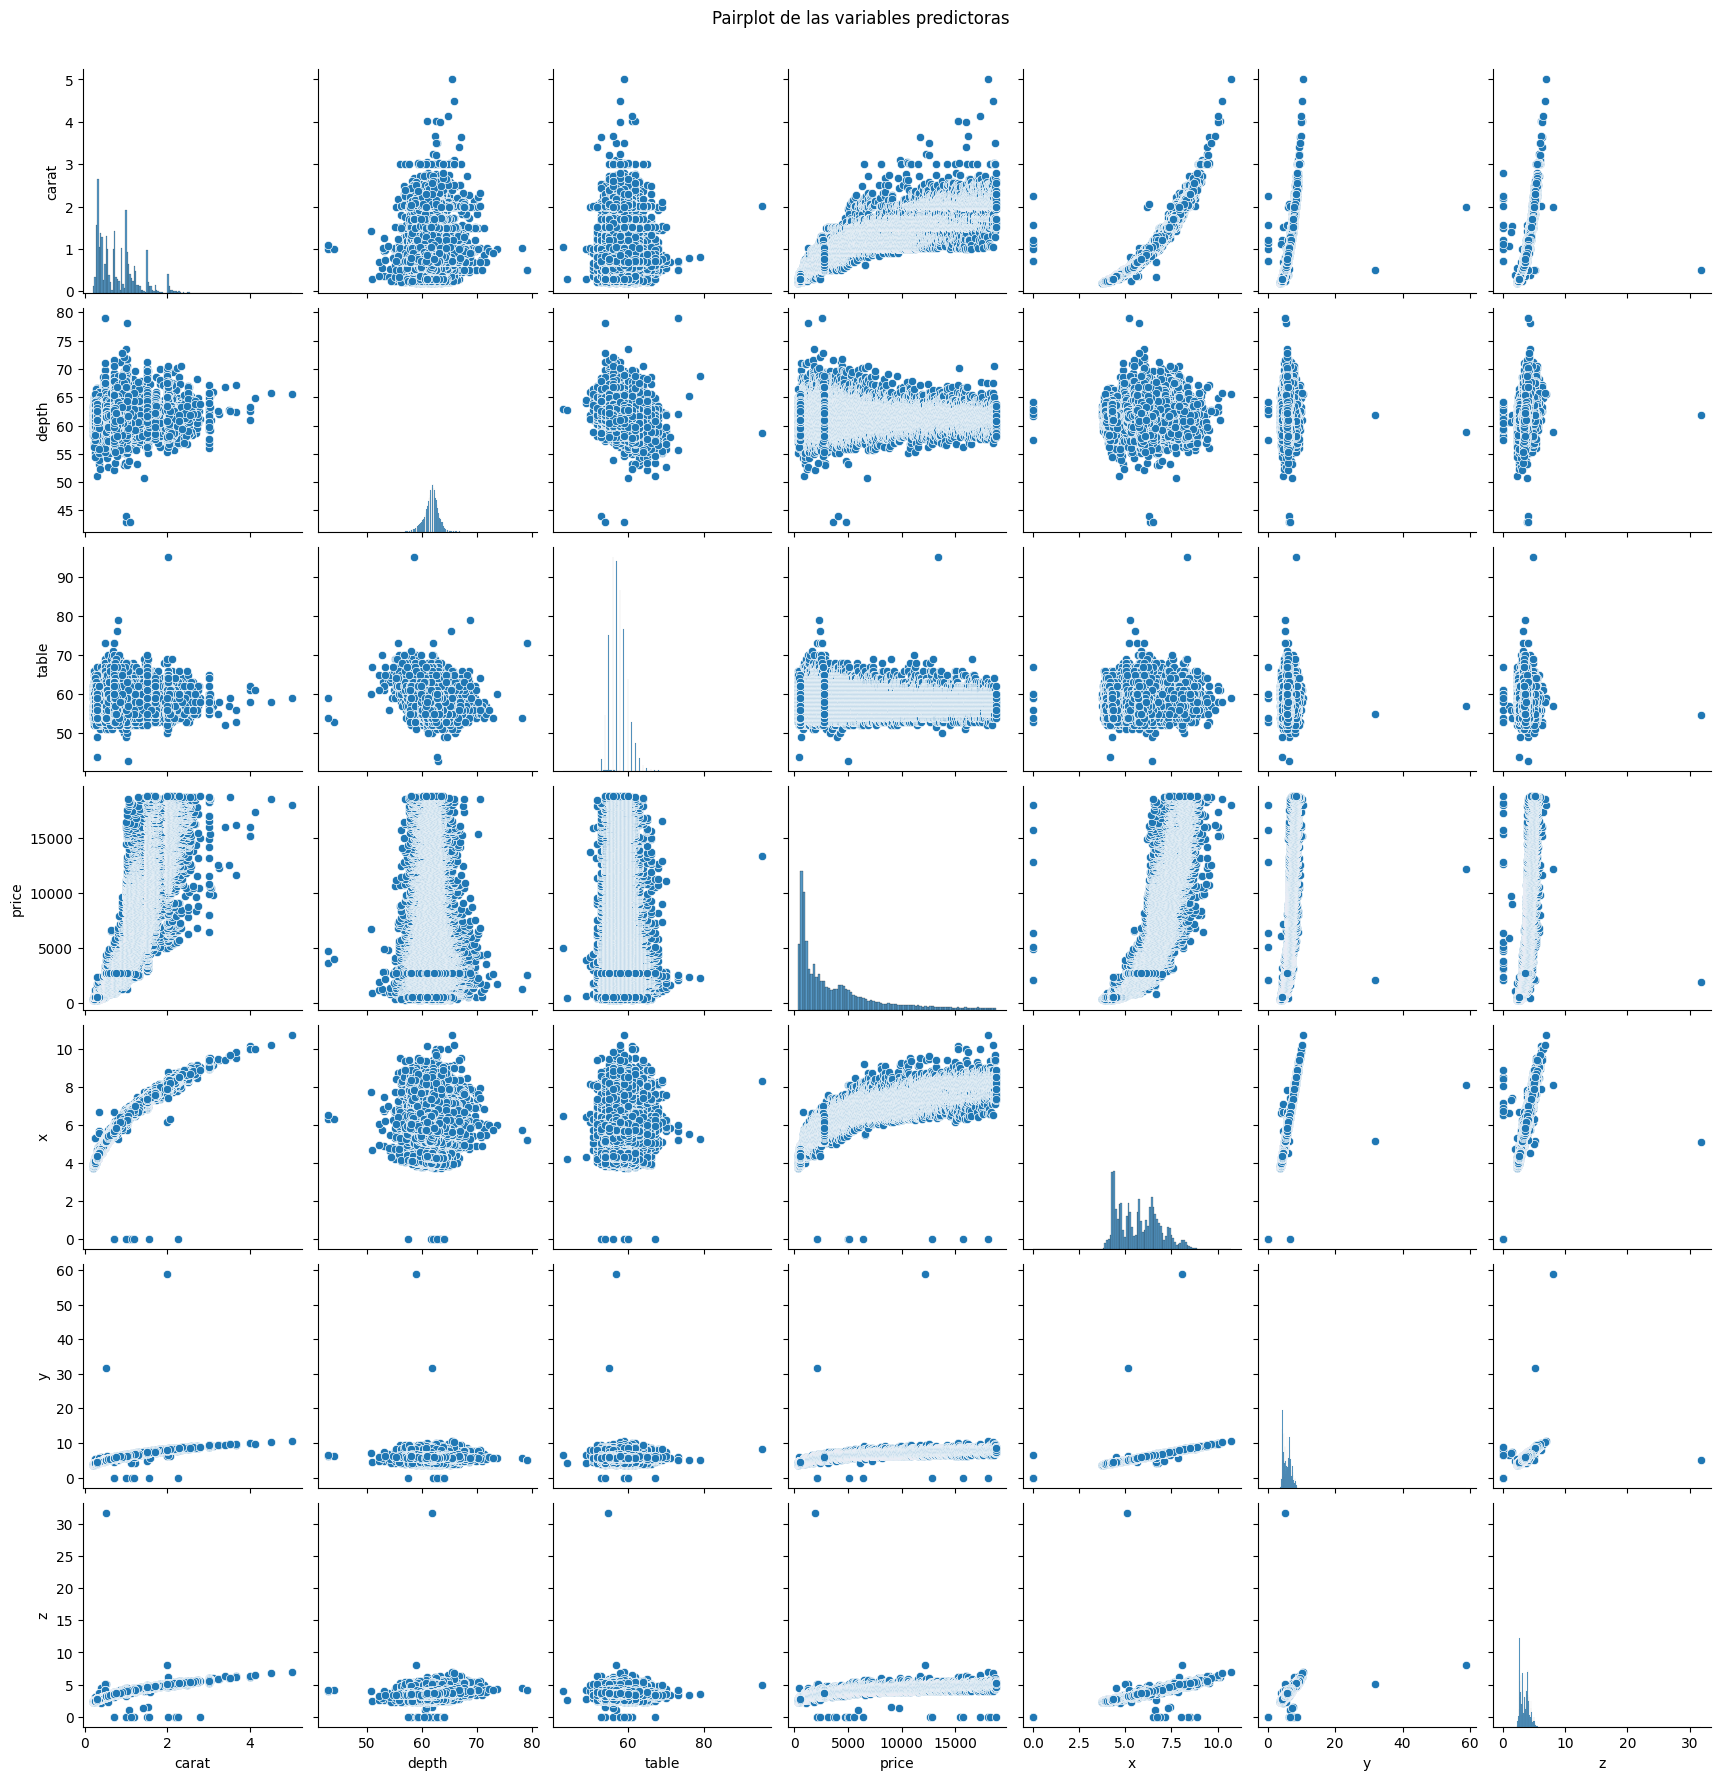

In [9]:
#Pairplot para elegir supuestos a comprobar
sns.pairplot(data, diag_kind='auto')
plt.suptitle("Pairplot de las variables predictoras", y=1.02)
plt.show()

In [10]:
#Modelo

#4. Dividir datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    data[X], y, test_size=0.4, random_state=42)

#5. Ajustar modelo de regresión múltiple
# Agregar constante para el intercepto
X_train_const = sm.add_constant(X_train)

# Ajustar modelo
modelo = sm.OLS(y_train, X_train_const).fit()

#6. Resumen estadístico del modelo
print(modelo.summary())

#7. Evaluación del modelo
X_test_const = sm.add_constant(X_test)
y_pred_test = modelo.predict(X_test_const)

RMSE = mean_squared_error(y_test, y_pred_test)
R2 = r2_score(y_test, y_pred_test)

print(f"\nEvaluación del Modelo en Datos de Prueba")
print(f"Error Cuadrático Medio (RMSE): {RMSE:.2f}")
print(f"Coeficiente de Determinación (R²): {R2:.4f}")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 3.285e+04
Date:                Fri, 12 Sep 2025   Prob (F-statistic):               0.00
Time:                        16:21:42   Log-Likelihood:            -2.8262e+05
No. Observations:               32364   AIC:                         5.653e+05
Df Residuals:                   32357   BIC:                         5.653e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.032e+04    568.141     35.759      0.0

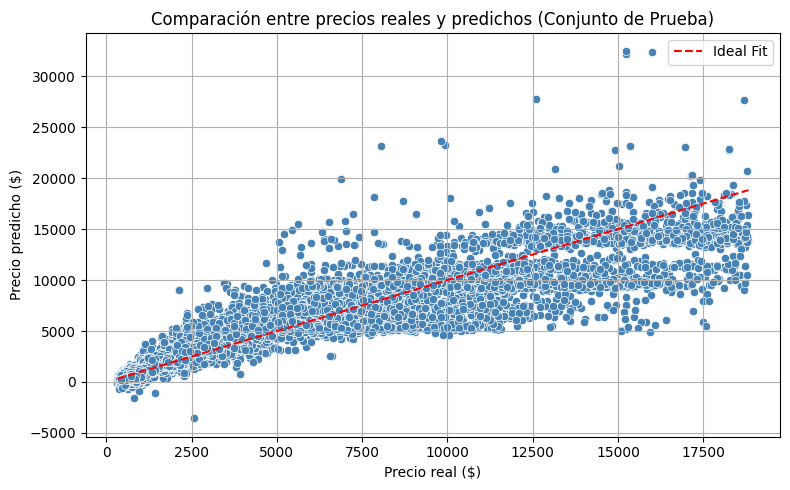

In [11]:
#8. Valores reales vs. los valores predichos del precio
# Use the test set for plotting
y_pred_test = modelo.predict(sm.add_constant(X_test))

# Gráfico de comparación
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_test, color='steelblue') # Use y_test and y_pred_test
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit') # Use test min/max
plt.xlabel('Precio real ($)')
plt.ylabel('Precio predicho ($)')
plt.title('Comparación entre precios reales y predichos (Conjunto de Prueba)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

 Aunque el modelo parece explicar una gran parte de la variabilidad de los precios (buen R2), el alto valor del RMSE indica que las predicciones individuales del modelo pueden ser bastante imprecisas. Esto podría deberse a la presencia de outliers en los datos o a que la relación entre las variables no es puramente lineal, lo que podría estar afectando negativamente la precisión de las predicciones

In [12]:
from statsmodels.stats.diagnostic import het_breuschpagan

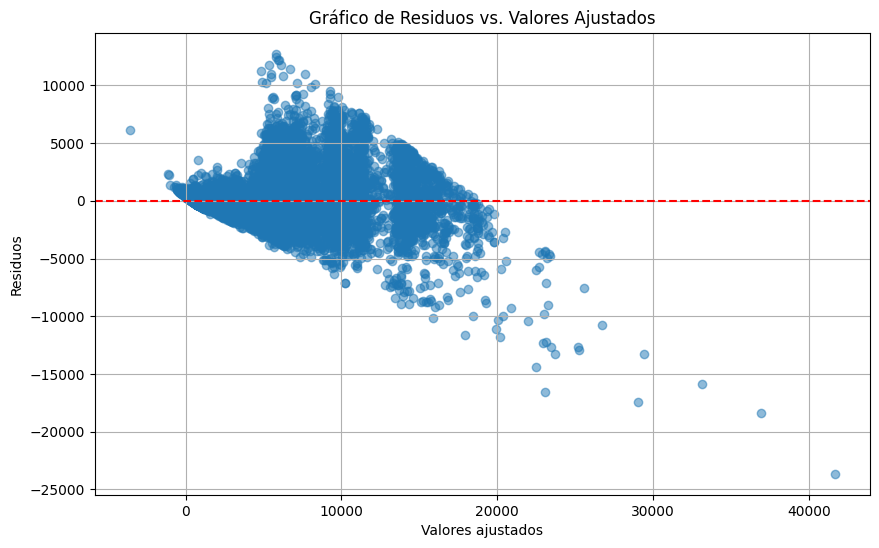

Estadístico de la prueba Breusch-Pagan: 6054.5803
p-valor de la prueba Breusch-Pagan: 0.0000
Estadístico F: 1241.0514
p-valor F: 0.0000


Interpretación de resultados:
Dado que el p-valor (0.0000) es menor que 0.05, se rechaza la hipótesis nula. Hay evidencia de heterocedasticidad.


In [13]:
#Prueba al supuesto de homoscedasticidad
# Graficar residuos vs. valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(modelo.fittedvalues, modelo.resid, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Valores Ajustados')
plt.grid(True)
plt.show()

# Realizar la prueba de Breusch-Pagan
bp_test_statistic, bp_p_value, f_test_statistic, f_p_value = sm.stats.diagnostic.het_breuschpagan(
    modelo.resid,
    X_train_const,
    robust=True
)

# Imprimir los resultados nombrados
print(f"Estadístico de la prueba Breusch-Pagan: {bp_test_statistic:.4f}")
print(f"p-valor de la prueba Breusch-Pagan: {bp_p_value:.4f}")
print(f"Estadístico F: {f_test_statistic:.4f}")
print(f"p-valor F: {f_p_value:.4f}")
print("\n")

# Realizar la prueba con el p-valor
alpha = 0.05

print('Interpretación de resultados:')
if bp_p_value < alpha:
    print(f"Dado que el p-valor ({bp_p_value:.4f}) es menor que {alpha}, se rechaza la hipótesis nula. Hay evidencia de heterocedasticidad.")
else:
    print(f"Dado que el p-valor ({bp_p_value:.4f}) es mayor que {alpha}, no se rechaza la hipótesis nula. No hay evidencia de heterocedasticidad.")


El gráfico indica heterocedasticidad, es decir, que la varianza de los errores no es constante a lo largo de los valores predichos.